In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [30]:
# Read the CSV files into a DataFrame
filtered_player_stats = pd.read_csv("filtered_combined_player_stats.csv")

fifa_players = pd.read_csv('male_players.csv')

/tmp/ipykernel_567961/2268711676.py:4: DtypeWarning: Columns (108) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa_players = pd.read_csv('male_players.csv')


In [31]:
#ensure dataframes are properly loaded
fifa_players.head()

,player_id,player_url,fifa_version,fifa_update,update_as_of,short_name,long_name,player_positions,overall,potential,...,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,231747,/player/231747/kylian-mbappe/240002,24.0,2.0,2023-09-22,K. Mbappé,Kylian Mbappé Lottin,"ST, LW",91,94,...,63+3,63+3,63+3,68+3,63+3,54+3,54+3,54+3,63+3,18+3
1,239085,/player/239085/erling-haaland/240002,24.0,2.0,2023-09-22,E. Haaland,Erling Braut Haaland,ST,91,94,...,63+3,63+3,63+3,62+3,60+3,62+3,62+3,62+3,60+3,19+3
2,192985,/player/192985/kevin-de-bruyne/240002,24.0,2.0,2023-09-22,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,...,80+3,80+3,80+3,79+3,75+3,70+3,70+3,70+3,75+3,21+3
3,158023,/player/158023/lionel-messi/240002,24.0,2.0,2023-09-22,L. Messi,Lionel Andrés Messi Cuccittini,"CF, CAM",90,90,...,63+3,63+3,63+3,64+3,59+3,49+3,49+3,49+3,59+3,19+3
4,165153,/player/165153/karim-benzema/240002,24.0,2.0,2023-09-22,K. Benzema,Karim Benzema,"CF, ST",90,90,...,64+3,64+3,64+3,64+3,60+3,55+3,55+3,55+3,60+3,18+3


In [32]:
#Filtering down the dataset into only the 'big 5' leagues and only the players from FIFA 23

#league_id 
#LaLiga - 53
#Prem - 13
#Bundesliga - 19
#Serie A - 31
#Ligue 1 - 16

filtered_fifa_players = fifa_players[fifa_players['league_id'].isin([53, 13, 19, 31, 16])]

fifa23_players = filtered_fifa_players[filtered_fifa_players['fifa_version'].isin([23])]
fifa23_players.head()
print(fifa23_players.shape[0])

2880


<AxesSubplot:>

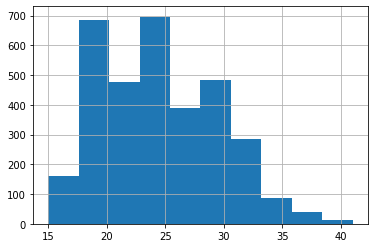

In [18]:
#Plotting possible key features and their distributions

filtered_player_stats['Age'].hist()

<AxesSubplot:>

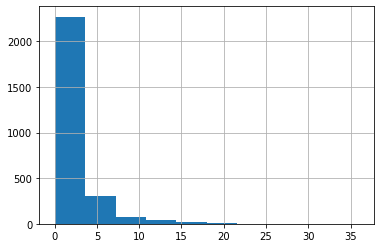

In [19]:
filtered_player_stats['Goals'].hist()

<AxesSubplot:>

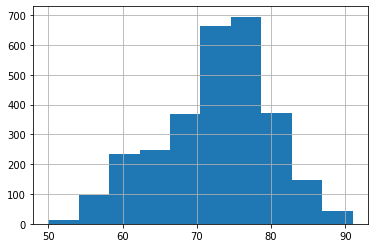

In [20]:
fifa23_players['overall'].hist()

Unique positions in 'club_position' variable:
['ST' 'RW' 'CF' 'RCM' 'GK' 'SUB' 'LCB' 'RDM' 'LW' 'RCB' 'CB' 'LCM' 'LB'
 'RB' 'CDM' 'LDM' 'CAM' 'LS' 'LAM' 'RM' 'RES' 'RS' 'RF' 'LM' 'RWB' 'LWB'
 'LF' 'CM' 'RAM']


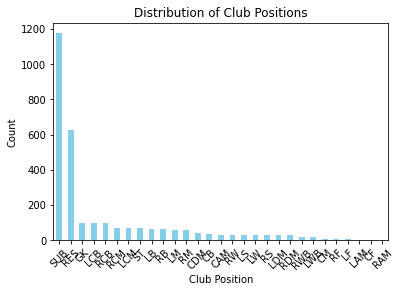

In [21]:
# Assuming 'fifa23_players' DataFrame is already loaded
#Printing all the unique positions in FIFA 23
unique_positions = fifa23_players['club_position'].unique()
print("Unique positions in 'club_position' variable:")
print(unique_positions)

# Count the occurrences of each club position
position_counts = fifa23_players['club_position'].value_counts()

# Plotting the distribution of club positions
position_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Club Positions')
plt.xlabel('Club Position')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


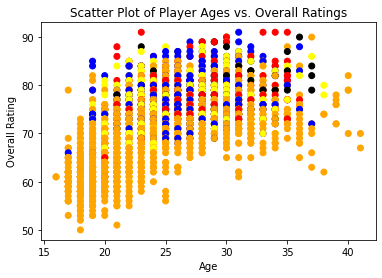

In [24]:
#Plotting age vs rating and using positions as color coded
#attackers - red, midfielders - blue, defenders - yellow, goalkeepers - black, substitutes - orange

color_map = {
    'ST': 'red', 'RW': 'red', 'CF': 'red', 'LW': 'red', 'LF': 'red', 'LS': 'red', 'RS': 'red', 'RF': 'red',
    'CM': 'blue', 'RAM': 'blue', 'LM': 'blue', 'LAM': 'blue', 'CAM': 'blue', 'LDM': 'blue', 'CDM': 'blue',
    'RM': 'blue', 'LCM': 'blue', 'RDM': 'blue', 'RCM': 'blue',
    'LCB': 'yellow', 'RCB': 'yellow', 'CB': 'yellow', 'LB': 'yellow', 'RB': 'yellow', 'RWB': 'yellow', 'LWB': 'yellow',
    'GK': 'black',
    'SUB': 'orange', 'RES': 'orange'
}

# Normalizing player ages and overall ratings
normalized_age = (fifa23_players['age'] - fifa23_players['age'].min()) / (fifa23_players['age'].max() - fifa23_players['age'].min())
normalized_overall = (fifa23_players['overall'] - fifa23_players['overall'].min()) / (fifa23_players['overall'].max() - fifa23_players['overall'].min())

# Scatter plot of 'overall' ratings against player ages with colors based on 'club_position'
plt.scatter(fifa23_players['age'], fifa23_players['overall'], c=fifa23_players['club_position'].map(color_map))
plt.title('Scatter Plot of Player Ages vs. Overall Ratings')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.show()


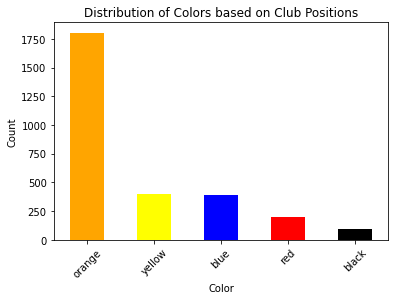

In [25]:
#Showing the distribution on position, shows most players are substitutes

# Count the occurrences of each color category
color_counts = fifa23_players['club_position'].map(color_map).value_counts()

# Plotting the distribution of colors
color_counts.plot(kind='bar', color=color_counts.index)
plt.title('Distribution of Colors based on Club Positions')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

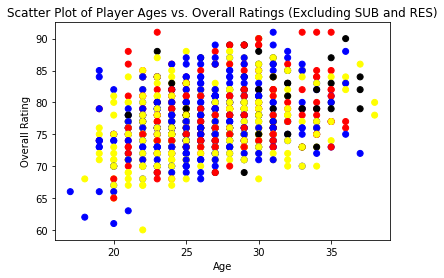

In [26]:
# Filter out 'SUB' and 'RES' positions for age vs overall rating
filtered_players = fifa23_players[~fifa23_players['club_position'].isin(['SUB', 'RES'])]

# Scatter plot of 'overall' ratings against player ages with colors based on 'club_position'
plt.scatter(filtered_players['age'], filtered_players['overall'], c=filtered_players['club_position'].map(color_map))
plt.title('Scatter Plot of Player Ages vs. Overall Ratings (Excluding SUB and RES)')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.show()

In [27]:
#printing out long names to see how it is formatted
#we are using 2 different datasets and this showed we will need to find a way to "match" the players to
#combine the ratings from the FIFA dataset
fifa23_players['long_name']

18350              Kylian Mbappé Lottin
18351    Lionel Andrés Messi Cuccittini
18352                     Karim Benzema
18353                Robert Lewandowski
18354                   Kevin De Bruyne
                      ...              
36229               Federico Brancolini
36269                     Edoardo Piana
36405                     Oliver Tipton
36628                 Dorian Ciezkowski
36654                       Isaac Price
Name: long_name, Length: 2880, dtype: object

In [33]:
from thefuzz import process
import pandas as pd

# Load the data
combined_player_stats = pd.read_csv("filtered_combined_player_stats.csv")
known_names = fifa23_players['long_name']


# Add a new column called 'rating' to the player_stats DataFrame
combined_player_stats['rating'] = None

# Loop through each corrupted name in the player_stats DataFrame
for idx, name in enumerate(combined_player_stats['Player']):
    # Find the best match from the list of known names
    best_match = process.extractOne(name, known_names)
    if best_match is not None:
        matched_name = best_match[0]
        rating = fifa23_players.loc[fifa23_players['long_name'] == matched_name, 'overall'].iloc[0]
        combined_player_stats.at[idx, 'rating'] = rating
        # Additional checks
        squad = combined_player_stats.at[idx, 'Squad']
        born_year = combined_player_stats.at[idx, 'Born']
        # Find the matched player's info
        matched_player = fifa23_players[fifa23_players['long_name'] == matched_name]
        if not matched_player.empty:
            matched_squad = matched_player['club_name'].iloc[0]
            matched_born_year = int(matched_player['dob'].iloc[0].split('-')[0])
            if born_year == matched_born_year:
                combined_player_stats.at[idx, 'rating'] = rating/99 #normalized rating
                
                #printing out the format of the matching process
                #print(best_match)
                #print(f"Matched name: {name}, Best match: {matched_name}, Rating: {rating}")
                #print(f"Squad and birth year matched for {name}")
            else:
                #if we cannot find a best 
                combined_player_stats.drop(idx, inplace=True)

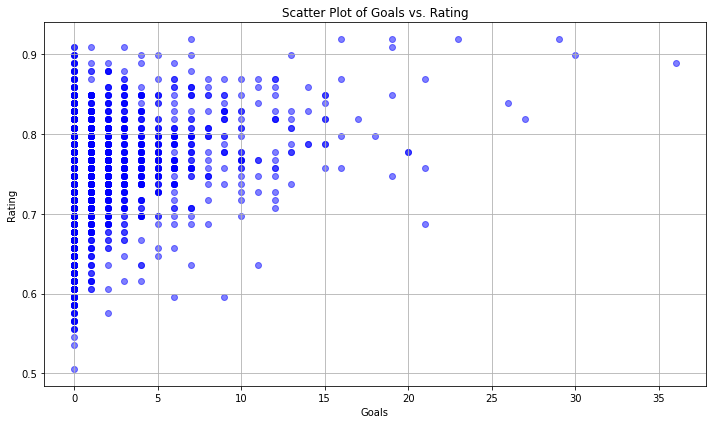

In [34]:
# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.scatter(combined_player_stats['Goals'], combined_player_stats['rating'], color='blue', alpha=0.5)

# Add labels and title
plt.title('Scatter Plot of Goals vs. Rating')
plt.xlabel('Goals')
plt.ylabel('Rating')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()